In [1]:
#import all the necessary libraries at the start itself (just for a cleaner code!!!)
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [2]:
df = pd.read_csv("/path/to/your/dataset/creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#EDA: Lets understand the story of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking for any null or duplicate values:
Null_values=df.isnull().any().any()
print(f'Null values in the data frame : {Null_values}')
# check for duplicate values

duplicate_values=df[df.duplicated()]
print(f'Duplicate values in the data frame : {len(duplicate_values)}')

Null values in the data frame : False
Duplicate values in the data frame : 1081


In [6]:
#so there are so many duplicate values lets drop them:
df = df.drop_duplicates()

In [7]:
duplicate_values=df[df.duplicated()]
print(f'Duplicate values in the data frame : {len(duplicate_values)}')

Duplicate values in the data frame : 0


In [8]:
#Extract columns for outliers
df_columns=df.iloc[:,1:30].columns
print(df_columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


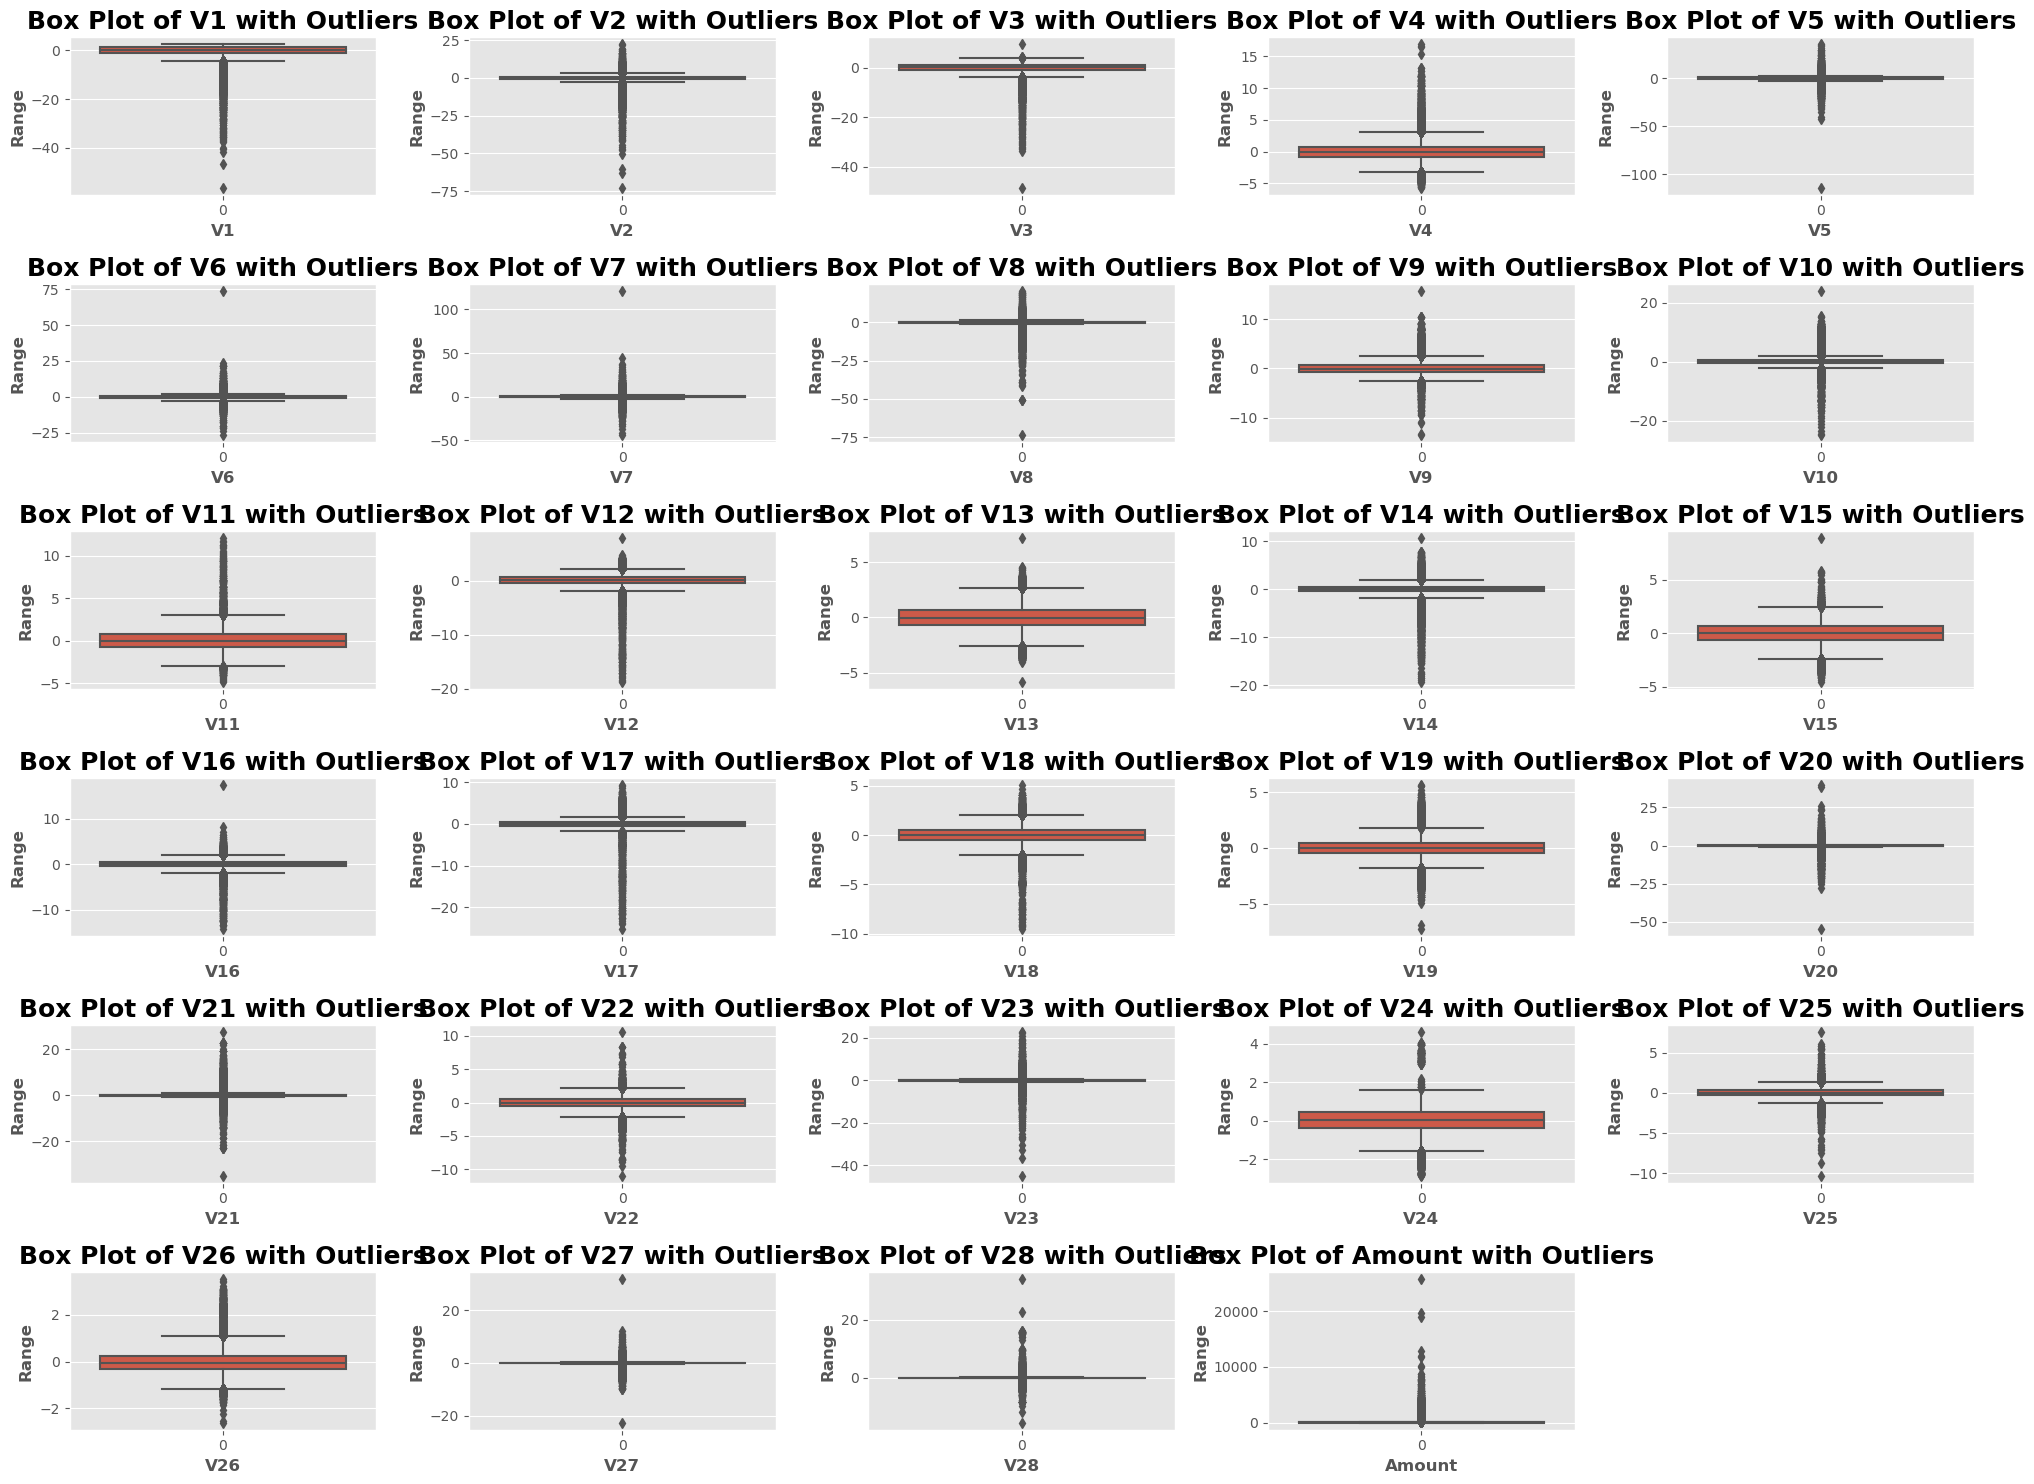

In [9]:
num_rows = 6
num_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and create a box plot in the corresponding subplot
for i, column in enumerate(df_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_xlabel(column,fontweight='bold')
    axes[i].set_ylabel('Range',fontweight='bold')
    axes[i].set_title(f"Box Plot of {column} with Outliers",fontweight='bold')

# remove excess subplots
fig.delaxes(axes[-1])
    
# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [10]:
for column in df_columns:
    
    #calculate quartiles and IQR
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)

    IQR=Q3-Q1

    #calculate upper and lower limits
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    #resetting the outliers to upper and lower limit
    df.loc[df[column]>=upper_limit,column]=upper_limit
    df.loc[df[column]<=lower_limit,column]=lower_limit

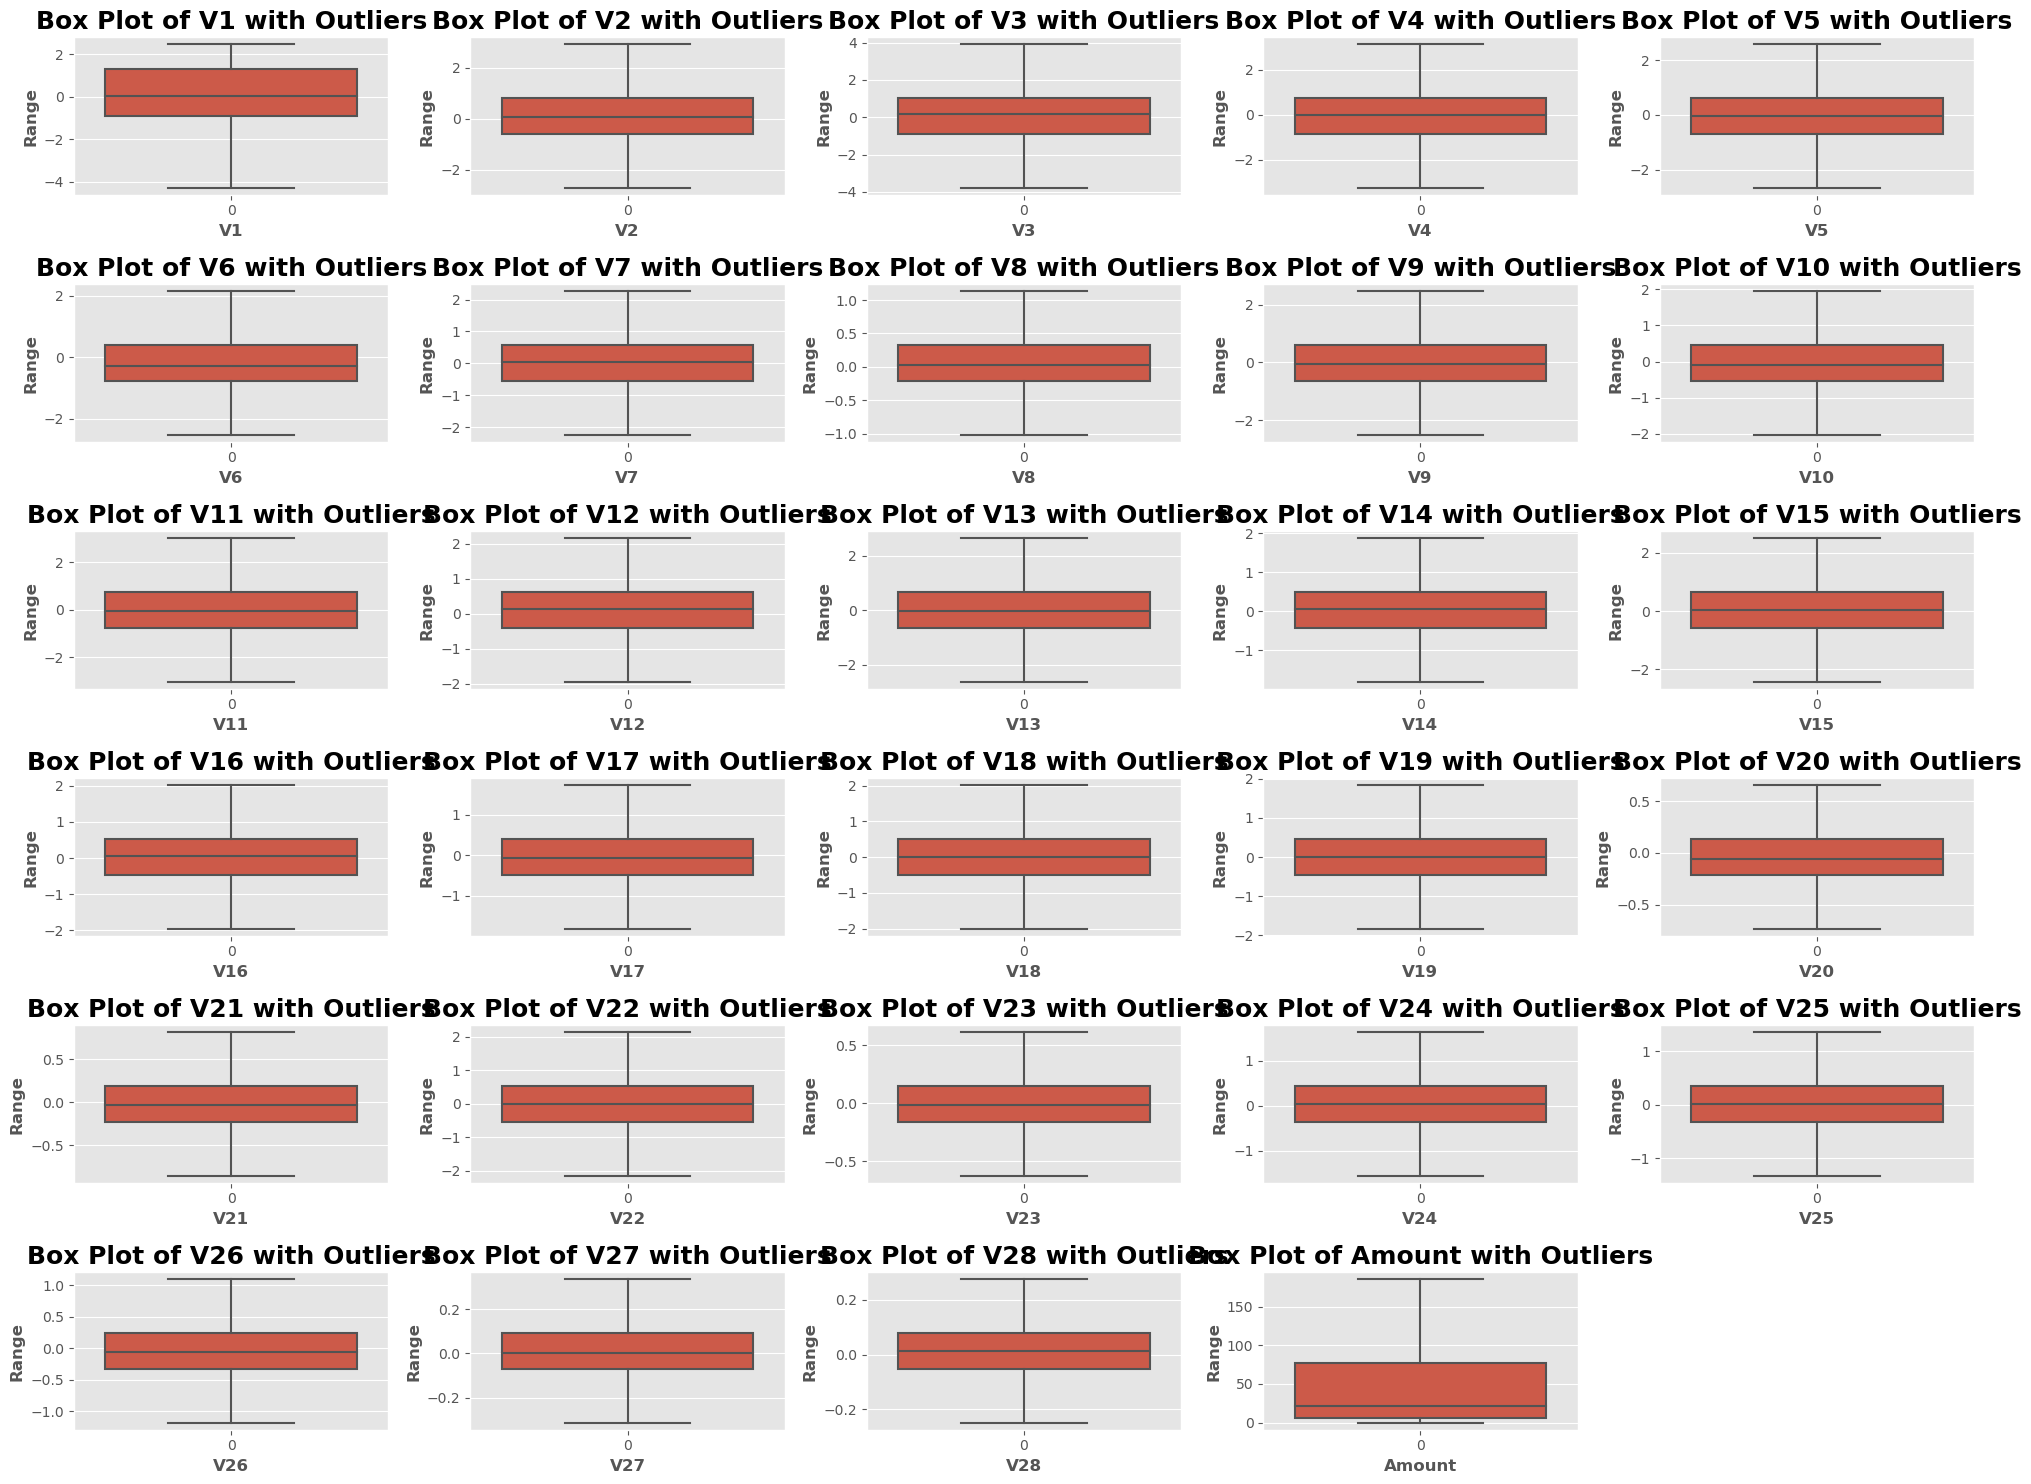

In [11]:
num_rows = 6
num_cols = 5

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and create a box plot in the corresponding subplot
for i, column in enumerate(df_columns):
    sns.boxplot(data=df[column], ax=axes[i])
    axes[i].set_xlabel(column,fontweight='bold')
    axes[i].set_ylabel('Range',fontweight='bold')
    axes[i].set_title(f"Box Plot of {column} with Outliers",fontweight='bold')
    
# remove excess subplots
fig.delaxes(axes[-1])
    
# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


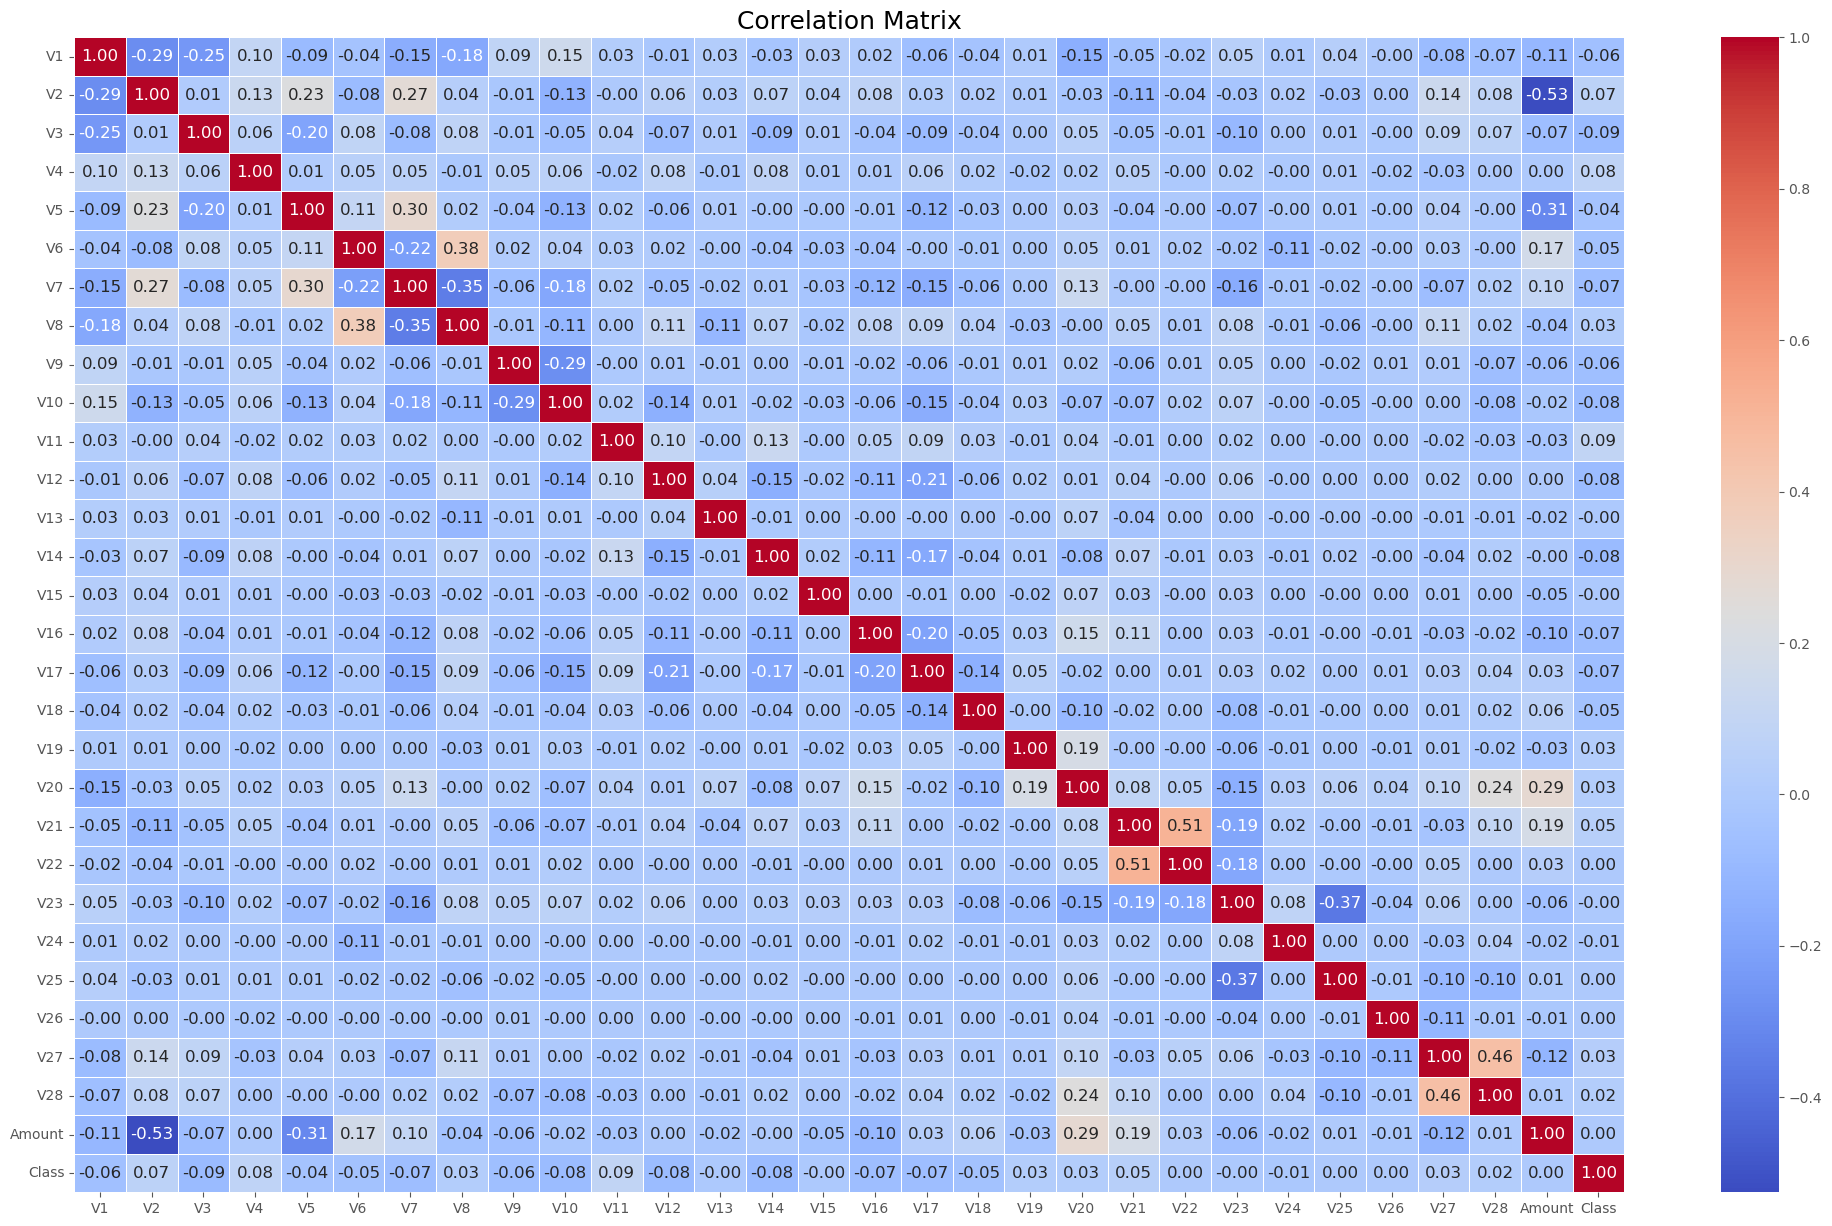

In [12]:
#create a correlation Matrix
correlation_matrix=df.iloc[:,1:].corr()

# set plot size
plt.figure(figsize=(25,15))

#plot heat map using seaborn
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

#set title
plt.title("Correlation Matrix")

#show plot 
plt.show()

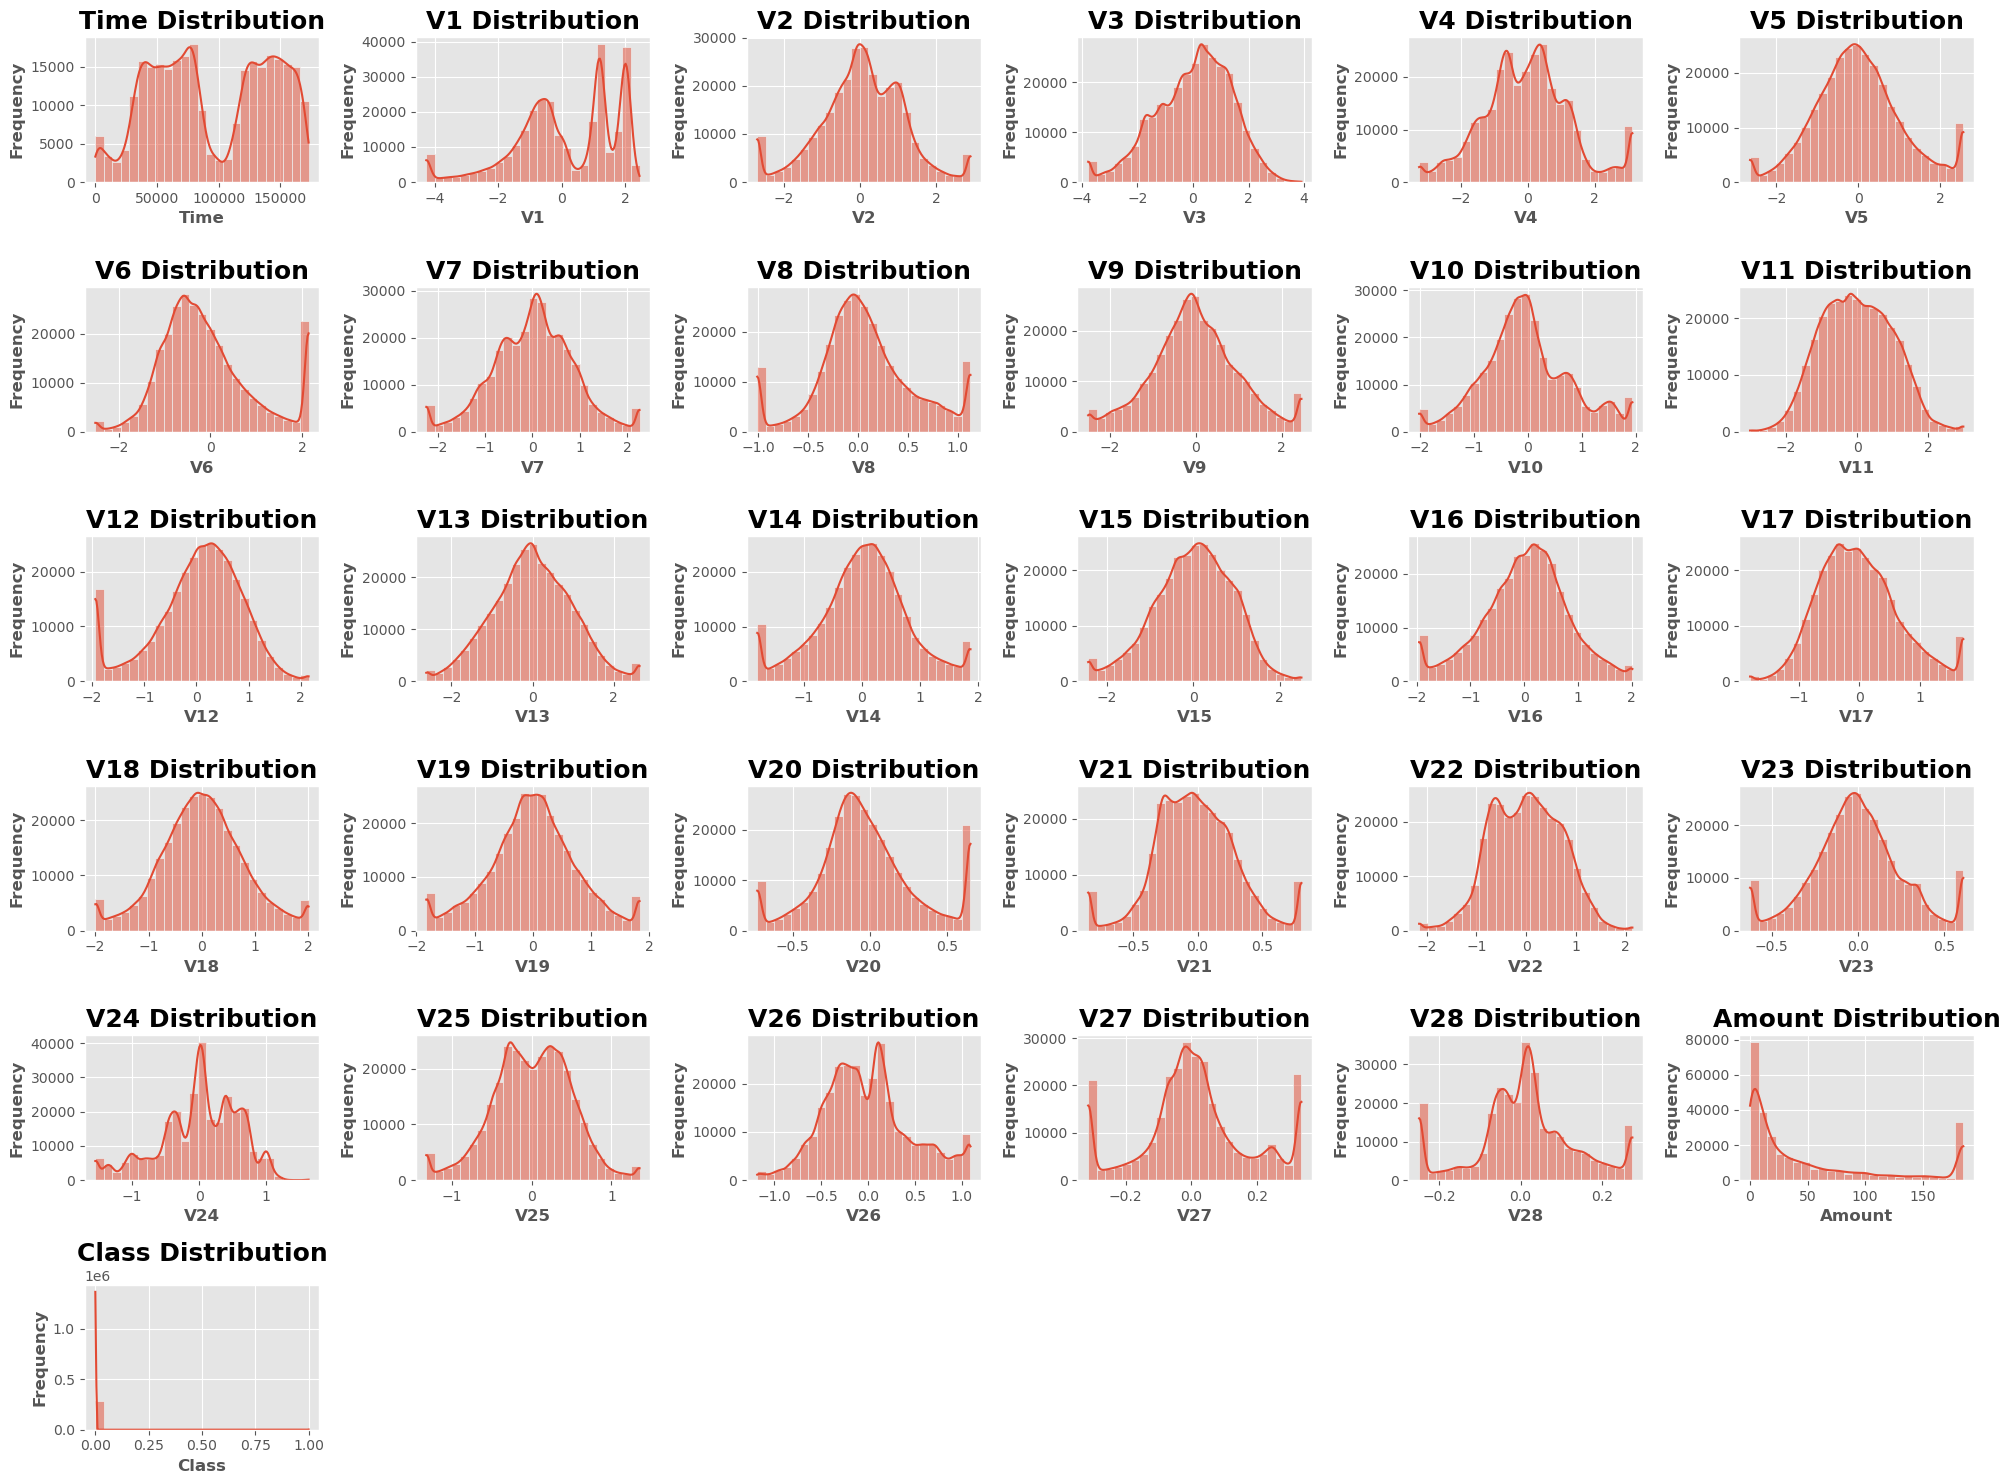

In [13]:
num_rows = 6
num_cols = 6
num_plots = len(df.columns)
# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 15)) 

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through each column and create a box plot in the corresponding subplot
for i, column in enumerate(df):
    sns.histplot(data=df[column],bins=25, kde=True , ax=axes[i])
    axes[i].set_xlabel(column,fontweight='bold')
    axes[i].set_ylabel('Frequency',fontweight='bold')
    axes[i].set_title(f"{column} Distribution",fontweight='bold')
    

# Remove excess subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])    
# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


From the plot, we can observe that the Time feature has a bimodal distribution with two peaks, indicating that there are two periods during the day when credit card transactions are more frequent. The first peak occurs at around 50,000 seconds (approximately 14 hours), while the second peak occurs at around 120,000 seconds (approximately 33 hours). This suggests that there may be a pattern in the timing of credit card transactions that could be useful for fraud detection.

From the plot, we can observe that the distribution of the Amount feature is highly skewed to the right, with a long tail to the right. This indicates that the majority of the transactions have low amounts, while a few transactions have extremely high amounts. As a result, this suggests that the dataset contains some outliers in terms of transaction amounts. Therefore, when building a model for fraud detection, it may be necessary to handle outliers in the Amount feature, for instance, by using a log transformation or robust statistical methods.


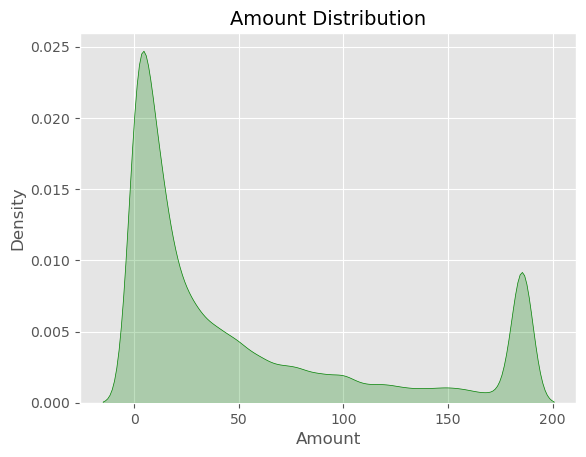

In [14]:
# Observing the Amount Disribution 
sns.kdeplot(data= df['Amount'],color = 'Green', fill=True)
plt.title('Amount Distribution',size=14)
plt.show()

In [15]:
# Counting number of fraud vs non-fraud transactions and displaying them with their ratio
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]
print(f'Fraudulent: {fraud}, Non-fraudulent: {nonfraud}')
print(f'Ratio of fraud to non-fraud: {fraud}/{nonfraud} ({fraud/nonfraud*100:.3f}%)')

Fraudulent: 473, Non-fraudulent: 283253
Ratio of fraud to non-fraud: 473/283253 (0.167%)


There is a decrease the ratio why? Because we have dropped the duplicates so there is a slight change to as propoesed in data description as mentioned in kaggle dataset.

Text(0.5, 0, '0:Non-Fraudulent, 1:Fraudulent')

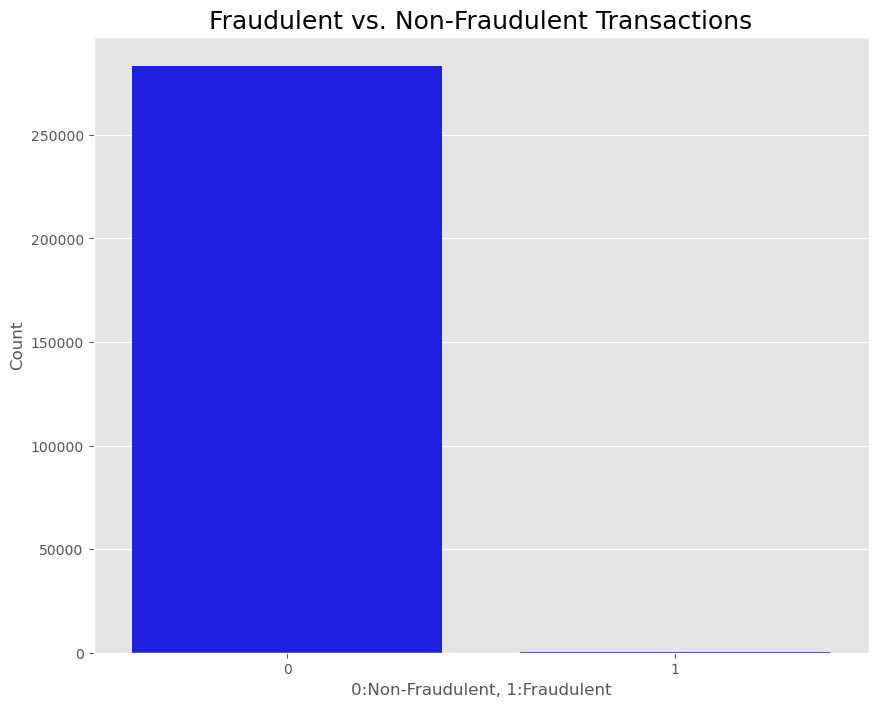

In [16]:
# Plotting count of fraud vs non-fraud transactions in a bar chart
plt.figure(figsize=(10,8))
sns.barplot(x=df['Class'].value_counts().index, y=df['Class'].value_counts(), color='blue')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent')



 From the plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

In [8]:
#MODELLING:
#SINCE I NEED TO MODEL BASED ON THE TARGET AND RESPONSE VARIABLES, AND TRAN_TEST DATASETS IM GOING TO SPLIT FOR ALL AND KEEP, I AM GOING TO
#USE 75% AND 25% SPLITS.
data = df.drop(columns=['Class'])

# Get the target variable
answer = df['Class']
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_trainval, X_test, y_trainval, y_test = train_test_split(data, answer
                                                          , test_size=0.2
                                                          , stratify=df['Class']
                                                          , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.25
                                                  , stratify=y_trainval
                                                  , random_state=42)

# Initialize the StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Scale the training, validation, and test sets using the scaler
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)
#perfroming oversampling? coz of the issue of imbalanced classes

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)
X_val_smote, y_val_smote = smote.fit_resample(X_val_std, y_val)


In [9]:
#1. LOGISITC REGRESSION:
# Run CV with 5 folds (logit)
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [10]:
#2.Random Forest
rf = RandomForestClassifier(max_depth=5, criterion='entropy')
random_forest = rf.fit(X_train_smote, y_train_smote)

In [14]:
# 3. Naive Bayes
# Fit a Naive Bayes Model
gnb = GaussianNB()
gnb_best = gnb.fit(X_train_smote, y_train_smote)

In [15]:
#4. Decision trees:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
decision_classifier = dt.fit(X_train_smote, y_train_smote)

In [16]:
#5. KNN
knn = KNeighborsClassifier(n_neighbors=3)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(knn, X_train_smote, y_train_smote, cv=cv, scoring='roc_auc', n_jobs=-1)
knn_classifier = knn.fit(X_train_smote, y_train_smote)

In [17]:
#6. XGBOOST
xgboost = XGBClassifier()
xgboost_classifier = xgboost.fit(X_train_smote, y_train_smote)

In [18]:
#7.DUNMMY CLASSIFIER (TO COMPARE ALL THE MODELS)
dummy = DummyClassifier()
dummy.fit(X_train_smote, y_train_smote)

DummyClassifier()

In [19]:
def roc_graphs(X, y, models, model_names, figsize=(20,18)):
    
    fig, ax = plt.subplots(figsize=figsize)

   
    for i, model in enumerate(models):
        y_pred = list(model.predict_proba(X)[:, 1])
        fpr, tpr, threshold = metrics.roc_curve(y, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_names[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)

    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize=30, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc='lower right', prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', fontsize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', fontsize=30)
    plt.xlabel('False Positive Rate', fontsize=30)

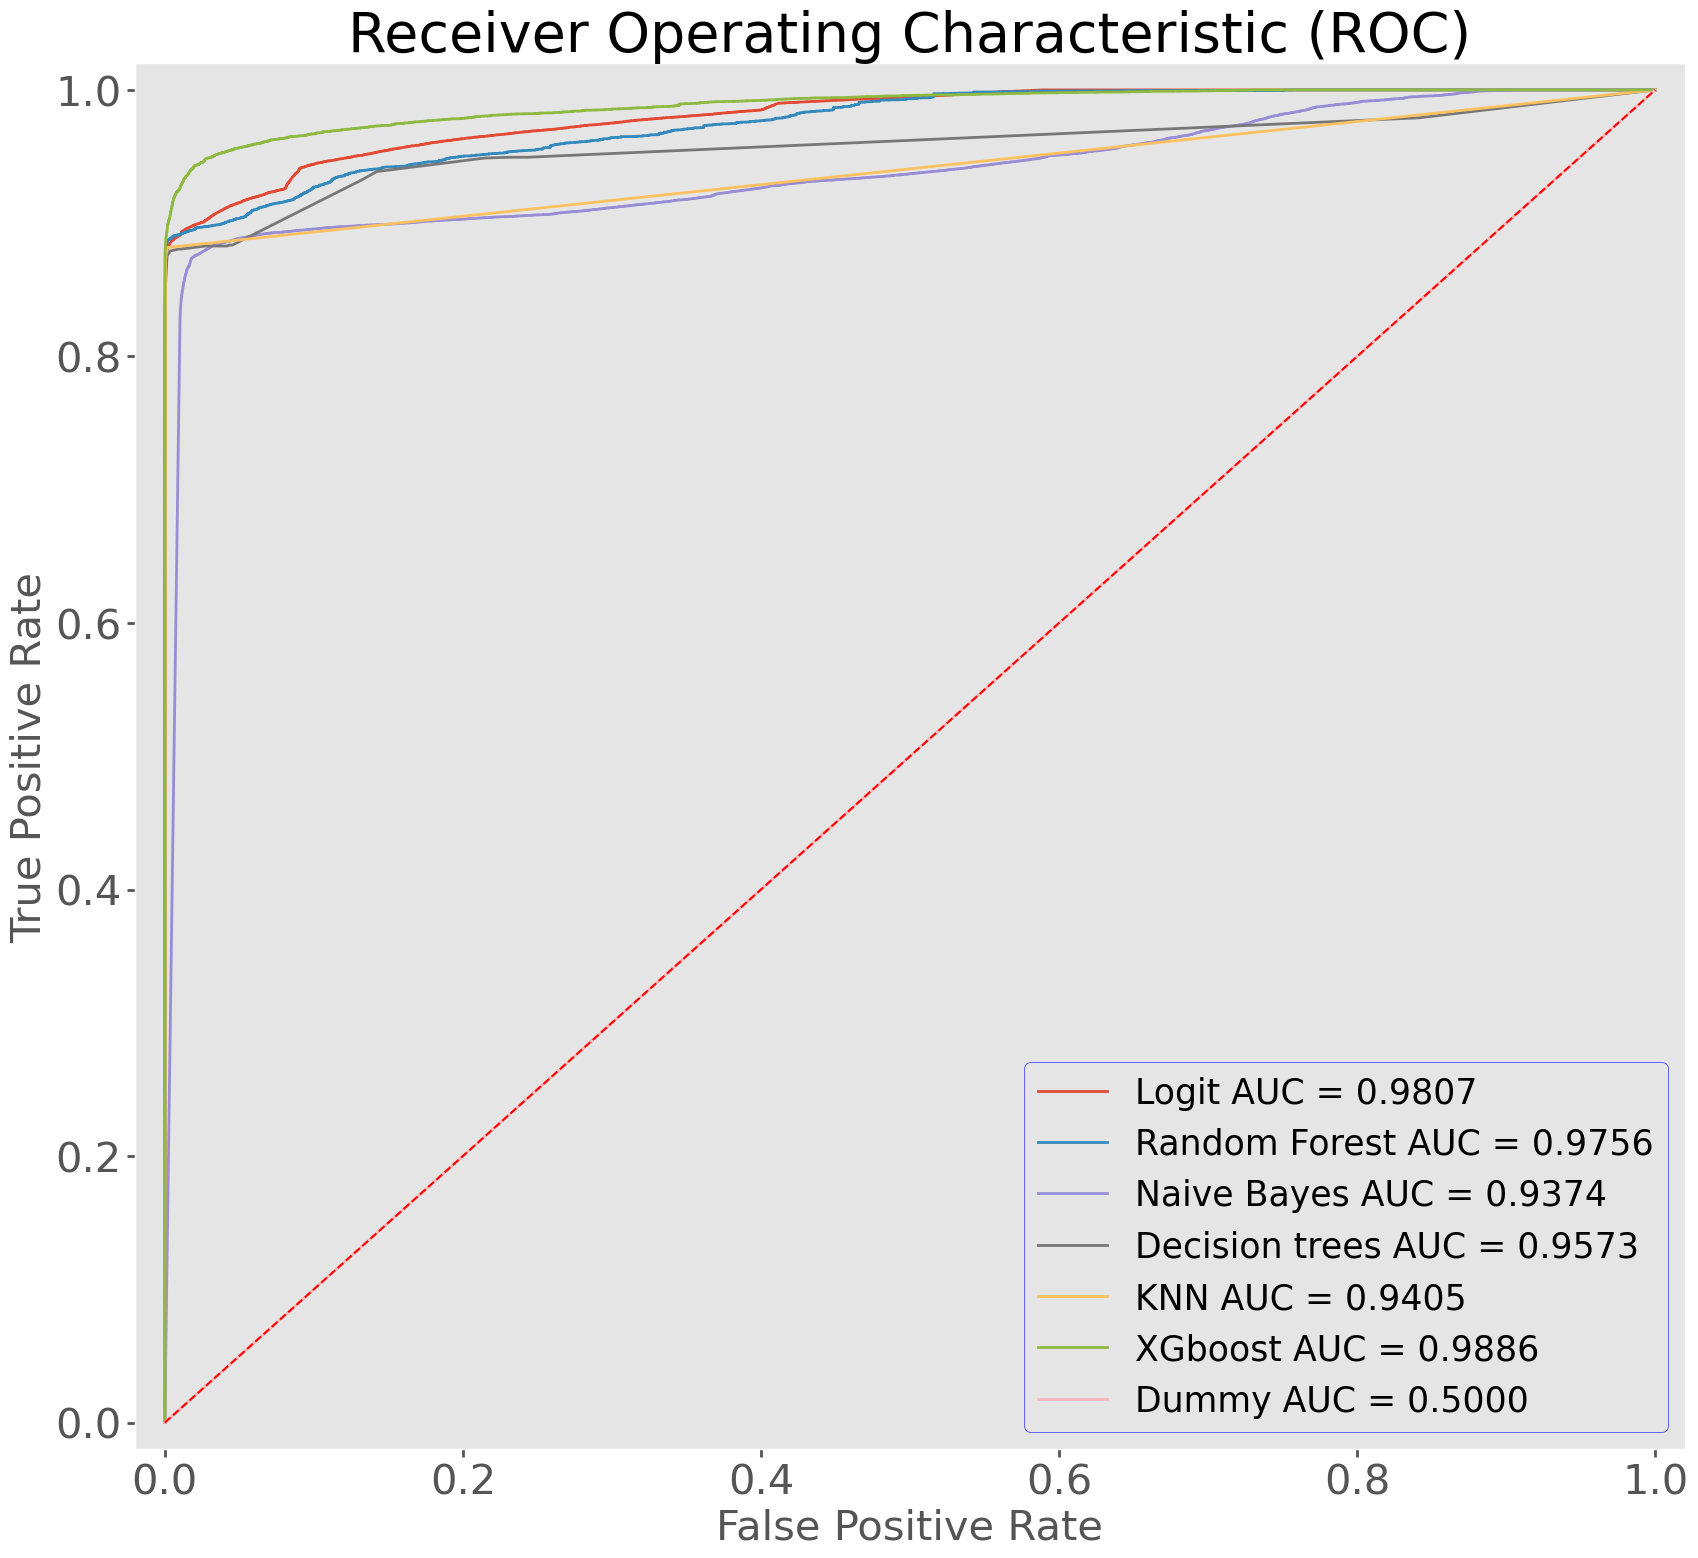

In [30]:
models = [logistic_grid.best_estimator_, random_forest,gnb_best,decision_classifier,knn_classifier,xgboost_classifier,dummy]
model_names = ['Logit' ,'Random Forest','Naive Bayes','Decision trees','KNN','XGboost','Dummy']
roc_graphs(X_val_smote, y_val_smote, models, model_names)
plt.savefig('roc_comparison.png');

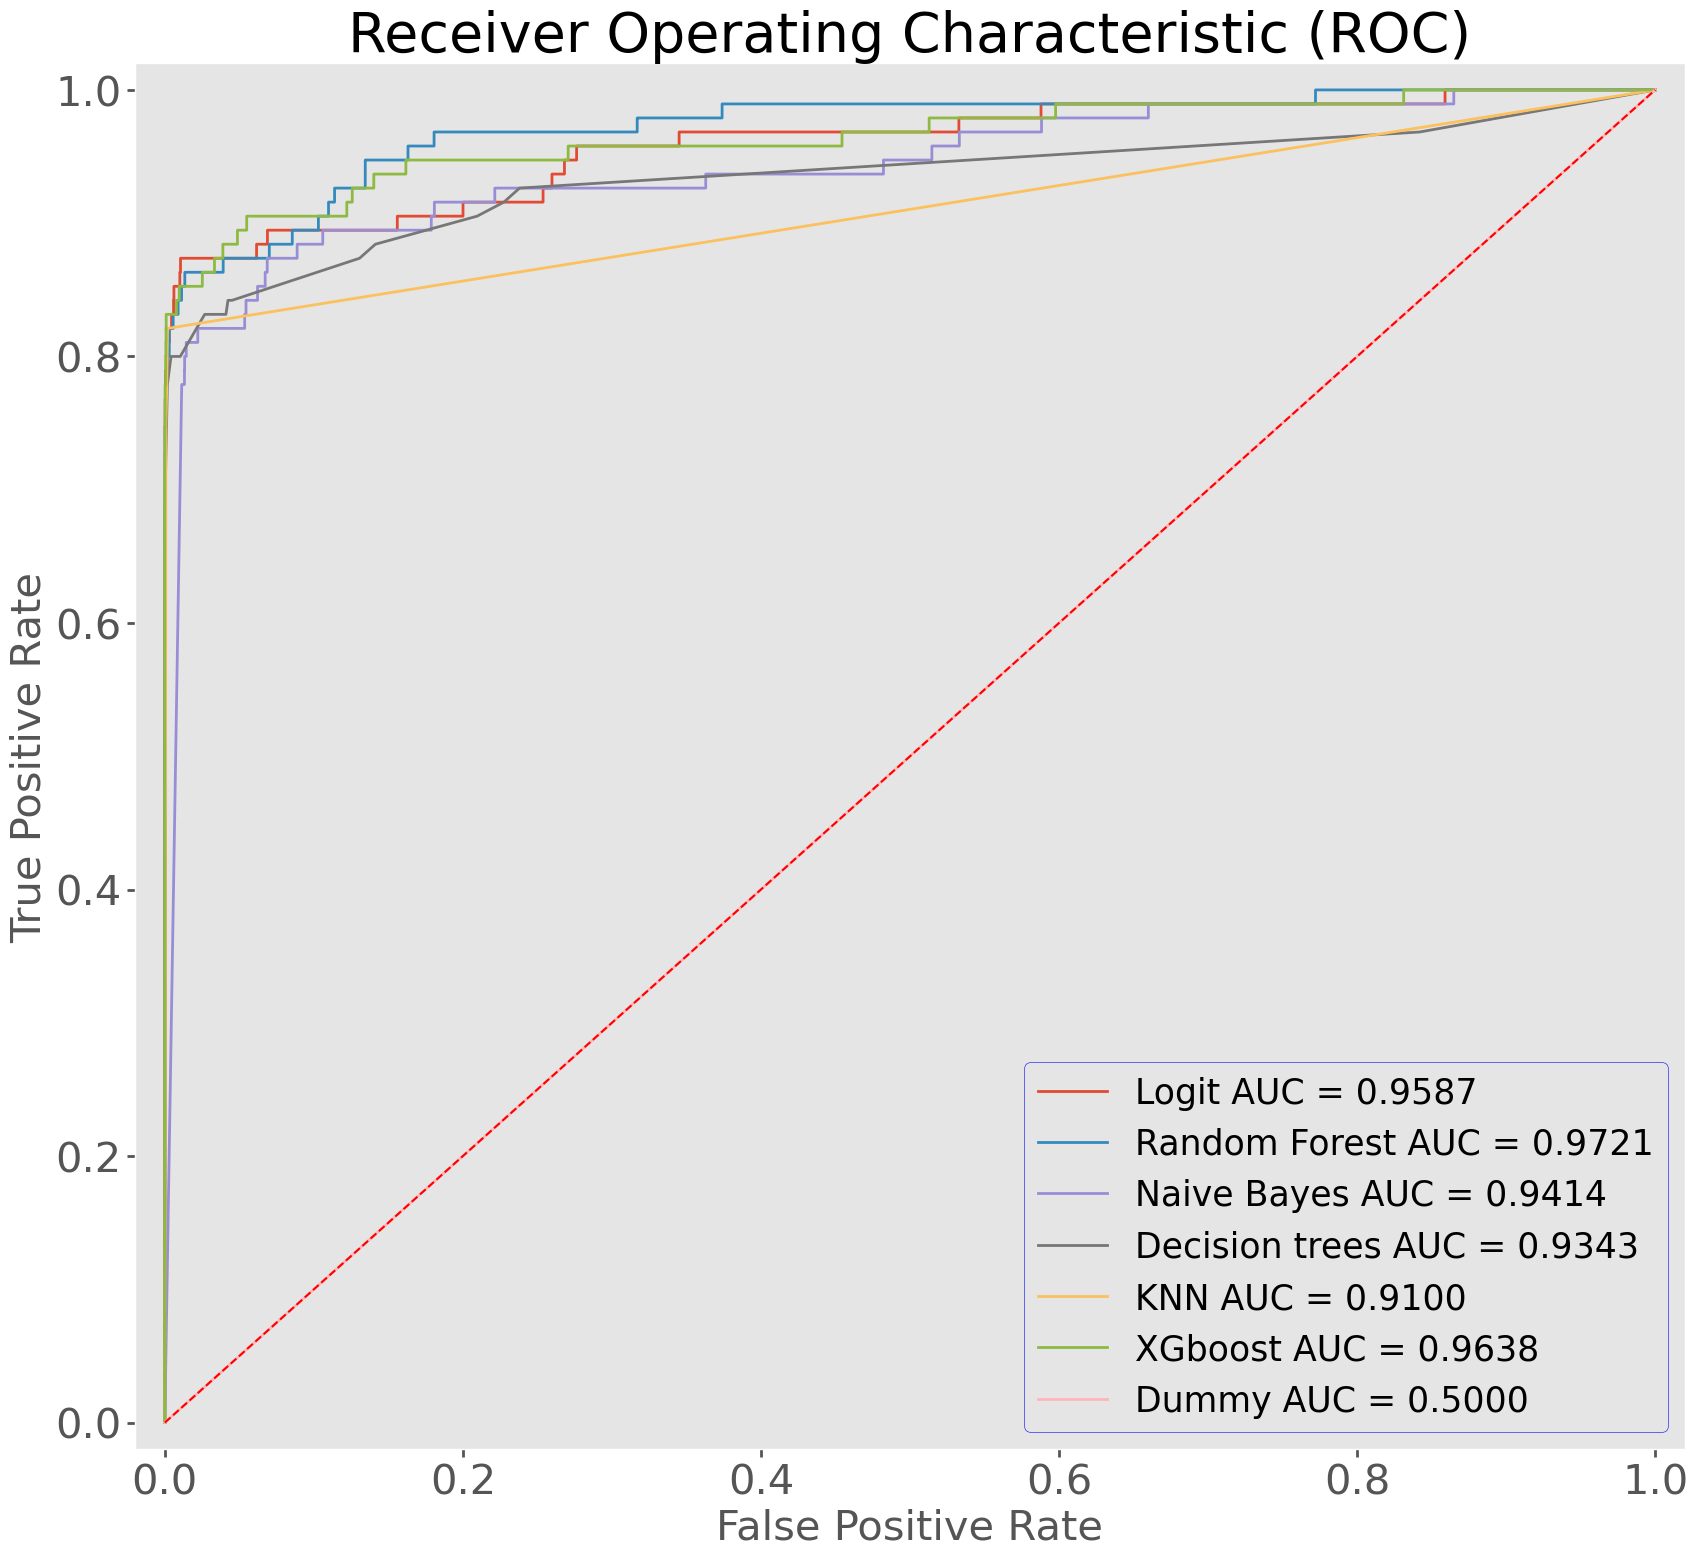

In [22]:
# Plot ROC curves for out-of-sample data
roc_graphs(X_test_std, y_test, models, model_names)
plt.savefig('roc_outsample.png');

In [23]:
#FINDING THE BEST METRICS AMONG THE CLASSIFIERS:
def find_best_threshold(model, num_steps):
    highest_f1 = 0
    best_threshold = 0
    best_acc = 0
    best_rec = 0
    best_pre = 0
    for threshold in np.linspace(0, 1, num_steps):
        y_predict = (model.predict_proba(X_val_smote)[:, 1] >= threshold)
        f1 = f1_score(y_val_smote, y_predict)
        acc = accuracy_score(y_val_smote, y_predict)
        rec = recall_score(y_val_smote, y_predict)
        pre = precision_score(y_val_smote, y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = \
                threshold, f1, acc, rec, pre
    
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [27]:
chart = list()
for item, name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item, 10)
    # Append the results to the chart list
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold', 'F1 Score', 'Accuracy', 'Recall', 'Precision'])
chart.to_csv('model_evaluation_scores.csv')
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logit,0.777778,0.937907,0.940875,0.893082,0.987470
1,Random Forest,0.555556,0.939154,0.942508,0.887398,0.997322
2,Naive Bayes,0.777778,0.923598,0.927548,0.875854,0.976848
3,Decision trees,0.888889,0.933841,0.937715,0.879155,0.995781
4,KNN,0.111111,0.936348,0.940063,0.881697,0.998221
5,XGboost,0.111111,0.941942,0.945067,0.891246,0.998754
6,Dummy,0.000000,0.666667,0.500000,1.000000,0.500000


In [35]:
#CONFUSION MATRIX FOR VALIDATION MODELS
def make_confusion_matrix_val(model, threshold=0.5):
    y_predict = (model.predict_proba(X_val_smote)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val_smote, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [47]:
#CONFUSION MATRIX FOR TESTED VALUES:
def make_confusion_matrix_test(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation=0)
    plt.title('Predicted vs. Actual', fontsize=20, pad=10)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

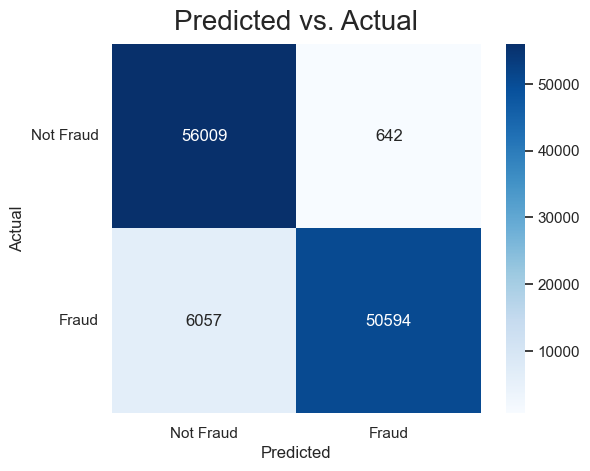

In [39]:
#models = [logistic_grid.best_estimator_, random_forest,gnb_best,decision_classifier,knn_classifier,xgboost_classifier,dummy]
# Create a confusion matrix for the Random Forest model with a threshold of 0.421 on the validation data
make_confusion_matrix_val(logistic_grid.best_estimator_, threshold=0.777778)


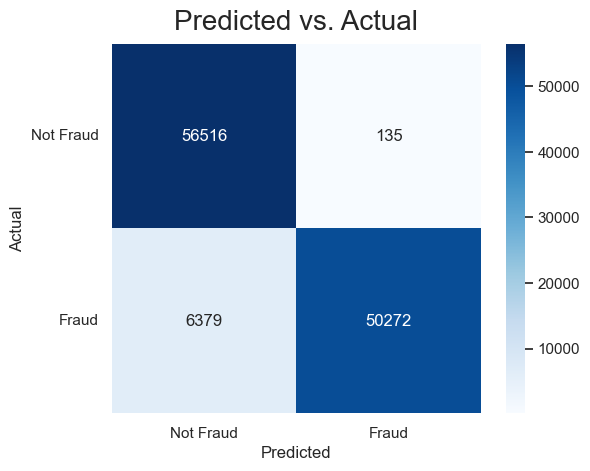

In [40]:
make_confusion_matrix_val(random_forest, threshold=0.555556)


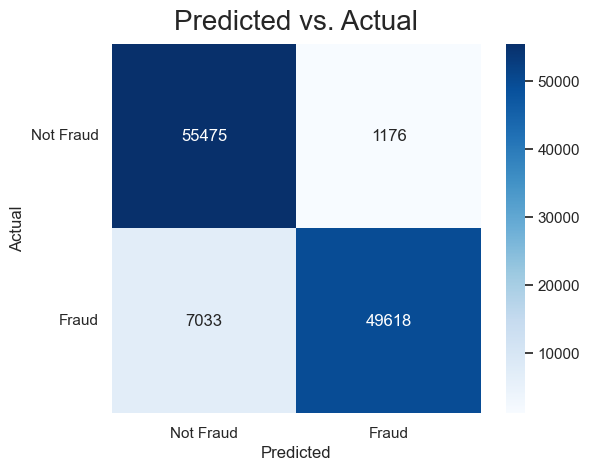

In [41]:
make_confusion_matrix_val(gnb_best, threshold=0.777778)


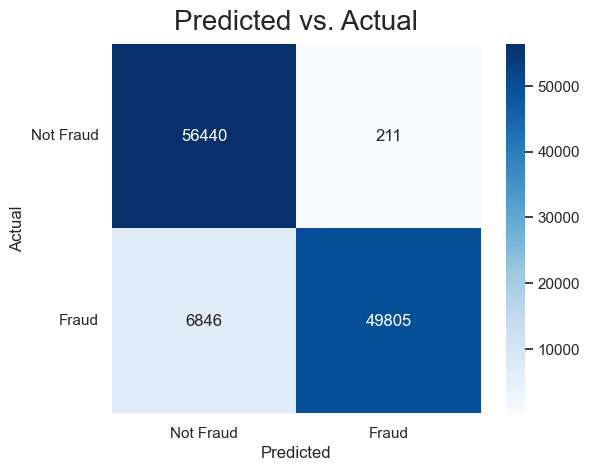

In [42]:
make_confusion_matrix_val(decision_classifier, threshold=0.888889)


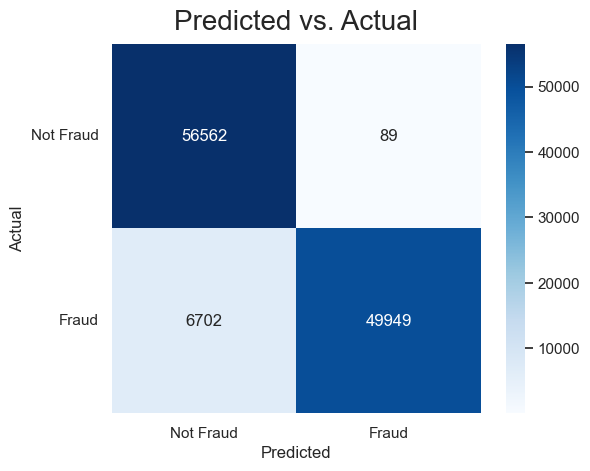

In [43]:
make_confusion_matrix_val(knn_classifier, threshold=0.111111)

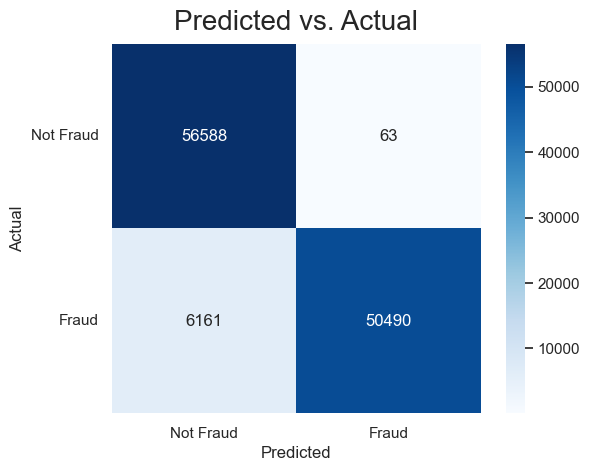

In [44]:
make_confusion_matrix_val(xgboost_classifier, threshold=0.111111)

TEST MATRICES : CONFUSION MATRIX:

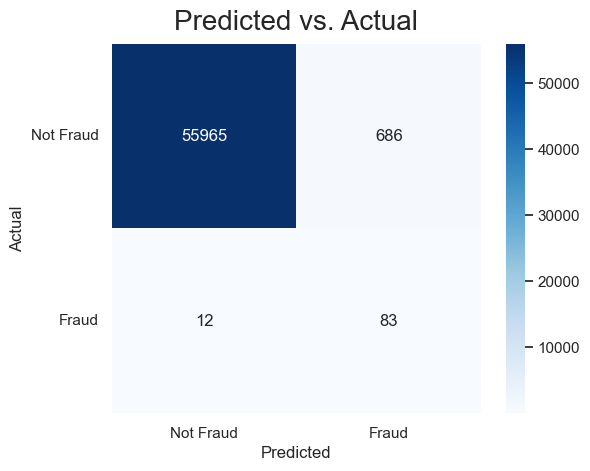

In [48]:
make_confusion_matrix_test(logistic_grid.best_estimator_, threshold=0.777778)


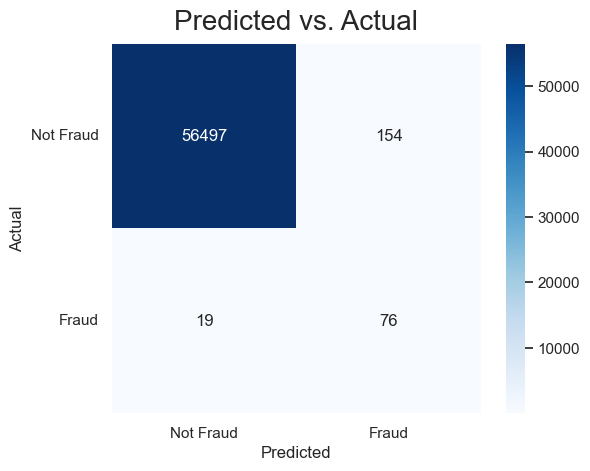

In [49]:
make_confusion_matrix_test(random_forest, threshold=0.555556)


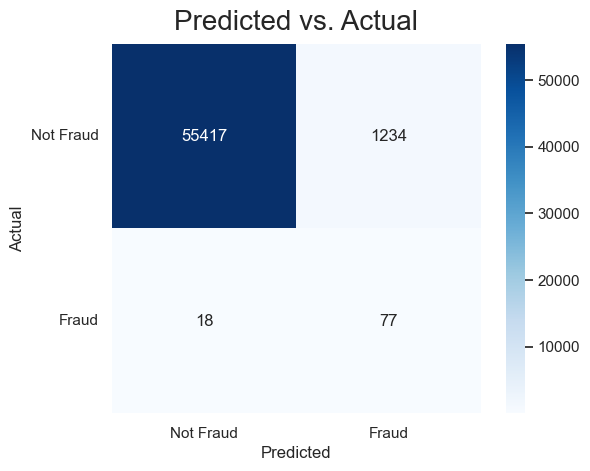

In [50]:
make_confusion_matrix_test(gnb_best, threshold=0.777778)


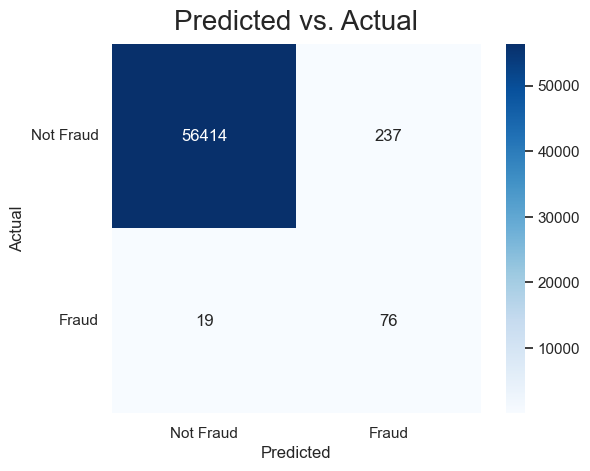

In [51]:
make_confusion_matrix_test(decision_classifier, threshold=0.888889)


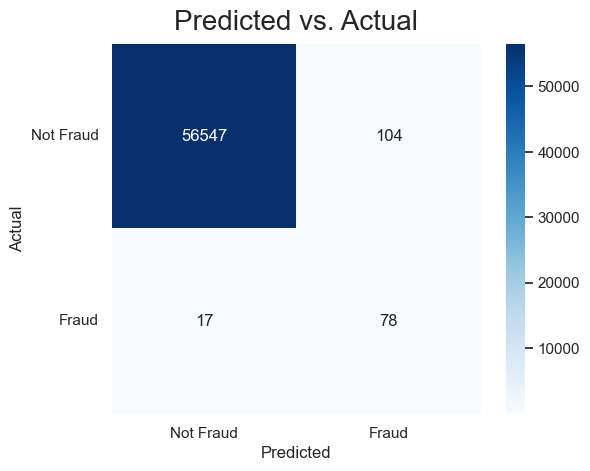

In [52]:
make_confusion_matrix_test(knn_classifier, threshold=0.111111)


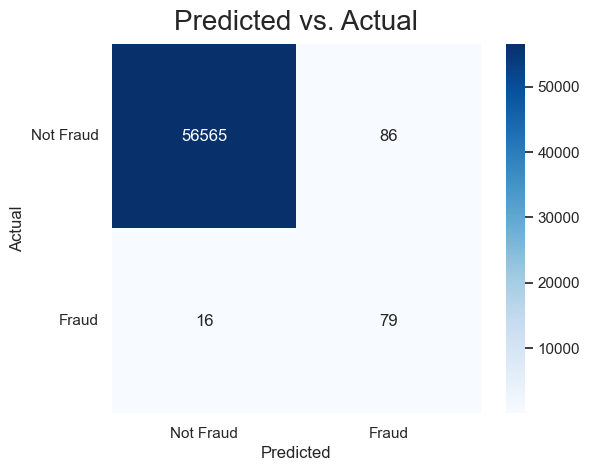

In [53]:
make_confusion_matrix_test(xgboost_classifier, threshold=0.111111)